# Marketting Campaign Report

## About Dataset - Marketing Campaign

**Context**
A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. The objective is to predict who will respond to an offer for a product or service

**Content**

1. AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
2. AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
3. AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
4. AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
5. AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
6. Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
7. Complain - 1 if customer complained in the last 2 years
8. DtCustomer - date of customer’s enrolment with the company
9. Education - customer’s level of education
10. Marital - customer’s marital status
11. Kidhome - number of small children in customer’s household
12. Teenhome - number of teenagers in customer’s household
13. Income - customer’s yearly household income
14. MntFishProducts - amount spent on fish products in the last 2 years
15. MntMeatProducts - amount spent on meat products in the last 2 years
16. MntFruits - amount spent on fruits products in the last 2 years
17. MntSweetProducts - amount spent on sweet products in the last 2 years
18. MntWines - amount spent on wine products in the last 2 years
19. MntGoldProds - amount spent on gold products in the last 2 years
20. NumDealsPurchases - number of purchases made with discount
21. NumCatalogPurchases - number of purchases made using catalogue
22. NumStorePurchases - number of purchases made directly in stores
23. NumWebPurchases - number of purchases made through company’s web site
24. NumWebVisitsMonth - number of visits to company’s web site in the last month
25. Recency - number of days since the last purchase


## Assignment

Combine Data Cleaning, Feature Selection, Modeling, and Interpretability into one report (Every assignment except TMINST) and make it a cohesive readable report.

The focus is readability and clarity.


The following must be answered:

1. What is the question?
2. What did you do?
3. How well did it work?
4. What did you learn?



# Installing Dependencies and Importing Libraries

In [1]:
!pip install eli5
!pip install h2o

In [34]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

# Data Cleaning and Feature Engineering

In [3]:
#Reading the Marketting campaign Dataset
data = pd.read_csv("https://raw.githubusercontent.com/makarandmadhavi/ML-Data-Cleaning-and-Feature-Selection/main/marketing_campaign.csv", sep=";")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i



Using data.info() we have the following information-


1.   25 integer data types, 
2.   3 categorical data type
3.   1 floating point data type


In [4]:
#pandas by default only displays 20 columns max, to view all 28 columns in output we set max_columns to None
pd.options.display.max_columns = None
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [5]:
data[["Education", "Marital_Status","Dt_Customer"]].describe()

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,2012-08-31
freq,1127,864,12


In [6]:
data[["Z_CostContact", "Z_Revenue"]].describe()

,Z_CostContact,Z_Revenue
count,2240.0,2240.0
mean,3.0,11.0
std,0.0,0.0
min,3.0,11.0
25%,3.0,11.0
50%,3.0,11.0
75%,3.0,11.0
max,3.0,11.0



Getting a first look at the raw data lets us understand some nature of the data.


1.   Dt_customer represents start date of customer journey, he can be converted to numeric type "customer since" to indicate number of days months or year a customer has been a part
2.   AcceptedCmp variables have 1/0 representing if customer accepted campaign offer before hence they can be treated as categorical yes/no
3. Response is our target prediction variable
4. We have no description of Z_CostContact	Z_Revenue variables in data description. Describing them rreveals they are filled with 11s and 3s and have no real significance hence we will be dropping those for this analysis.


Considered Data Types:- 

Column Data type (categorical/numeric)                 

-------      

Year_Birth              int64  numeric

Education               object categorical

Marital_Status          object categorical

Income                 float64 numeric

Kidhome                 int64  numeric

Teenhome                int64  numeric

Dt_Customer             object categorical

Recency                 int64  numeric

MntWines                int64  numeric

MntFruits               int64  numeric

MntMeatProducts         int64  numeric

MntFishProducts         int64  numeric

MntSweetProducts        int64  numeric

MntGoldProds            int64  numeric

NumDealsPurchases       int64  numeric

NumWebPurchases         int64  numeric

NumCatalogPurchases     int64  numeric

NumStorePurchases       int64  numeric

NumWebVisitsMonth       int64  numeric

AcceptedCmp3            int64  categorical

AcceptedCmp4            int64  categorical

AcceptedCmp5            int64  categorical

AcceptedCmp1            int64  categorical

AcceptedCmp2            int64  categorical

Complain                int64  categorical

Response                int64  categorical

In [7]:
#Dropping columns 
data.drop(columns = ["Z_CostContact","Z_Revenue","ID",],inplace = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

## Null Values

In [8]:
#checking if the any data is missing
percent_missing = data.isnull().sum() * 100 / len(data)
null_values_total = data.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'Missing_Total' : null_values_total,
                                 'percent_missing': percent_missing,
                                 })
missing_value_df

,Missing_Total,percent_missing
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,24,1.071429
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000
MntWines,0,0.000000
MntFruits,0,0.000000


There are several ways to handle null-values :



1. We can delete the rows containing null-values
2. We can impute the mean value
3. We can input the mean value of a specific population : in this case we would split by Education
4. We can use a model to predict missing values


With our dataset, we will fill missing values of Income by mean of Eduction

In [9]:
data['Income'].fillna(data.groupby('Education')['Income'].transform('mean'), inplace = True)

In [10]:
#checking if the any data is missing
percent_missing = data.isnull().sum() * 100 / len(data)
null_values_total = data.isnull().sum()
missing_value_df = pd.DataFrame({
                                 'Missing_Total' : null_values_total,
                                 'percent_missing': percent_missing,
                                 })
missing_value_df

,Missing_Total,percent_missing
Year_Birth,0,0.0
Education,0,0.0
Marital_Status,0,0.0
Income,0,0.0
Kidhome,0,0.0
Teenhome,0,0.0
Dt_Customer,0,0.0
Recency,0,0.0
MntWines,0,0.0
MntFruits,0,0.0


## Numeric data distribution

In [11]:
data.describe()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,1968.805804,52253.592375,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,0.149107
std,11.984069,25039.085601,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.356274
min,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1970.000000,51609.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Text(0, 0, 'MntWines'),
 Text(0, 0, 'MntFruits'),
 Text(0, 0, 'MntMeatProducts'),
 Text(0, 0, 'MntFishProducts'),
 Text(0, 0, 'MntSweetProducts'),
 Text(0, 0, 'MntGoldProds')]

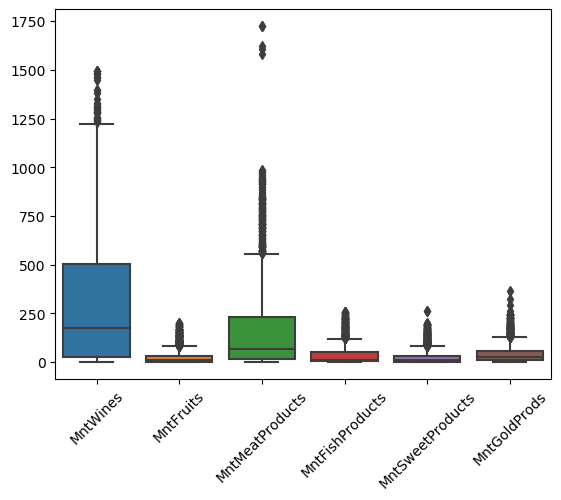

In [12]:
data_f=data[["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"]]
x = sns.boxplot(data=data_f)
x.set_xticklabels(x.get_xticklabels(),rotation=45)


data.describe() gives us an estimate of the numeric distribution of data


1. Average age of customers is 51 with median being 50 with max being 127 which I think is a rare case
2. Average income is 52253 with min and max being 1730 and 666666 indicating presence of outliers
3. Recency ranges between 0 and 99 indicating all customers surveyed were very active in within last 4 months
4. Amount spent on Wines and Meat is the most indicating thats where the majority sales lies
5. Number of items purchased is usually higher in stores
6. Almost all columns in the data need to be normalized as there is a vast difference in range of values of all columns



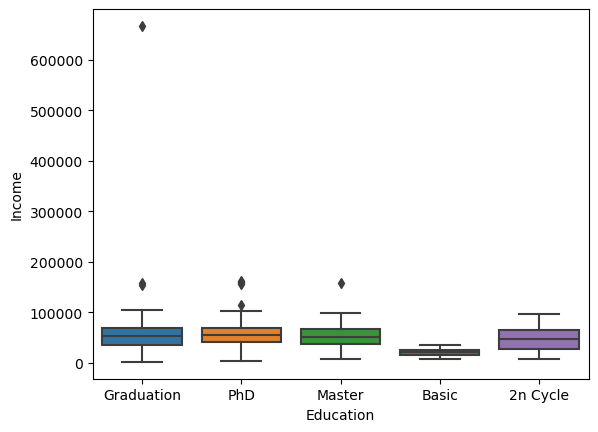

In [13]:
sns.boxplot( x = 'Education',y = 'Income', data = data)

Plotting Income grouped by education shows very less correlation between income and education for all educational categories except Basic which has very low Income. 

Notice we have ommited outliers to get a better visual representation of the boxplot

In [14]:
print(data['Income'].quantile(0.99))

94437.68000000001


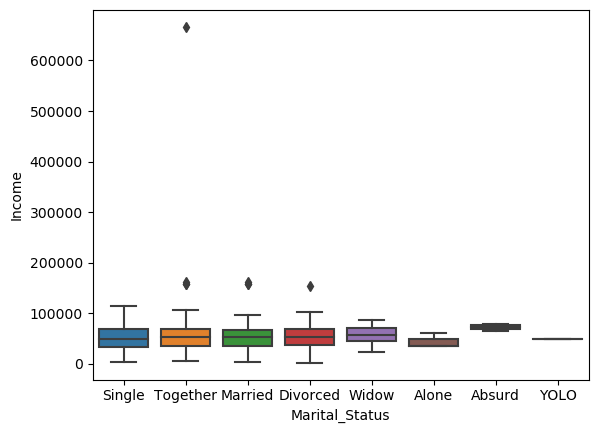

In [15]:
sns.boxplot( x = 'Marital_Status',y = 'Income', data = data)

## Data Transformation

/var/folders/qv/7nzw1kfx2wg1fmvdsrhvzmsc0000gn/T/ipykernel_32945/3965302480.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


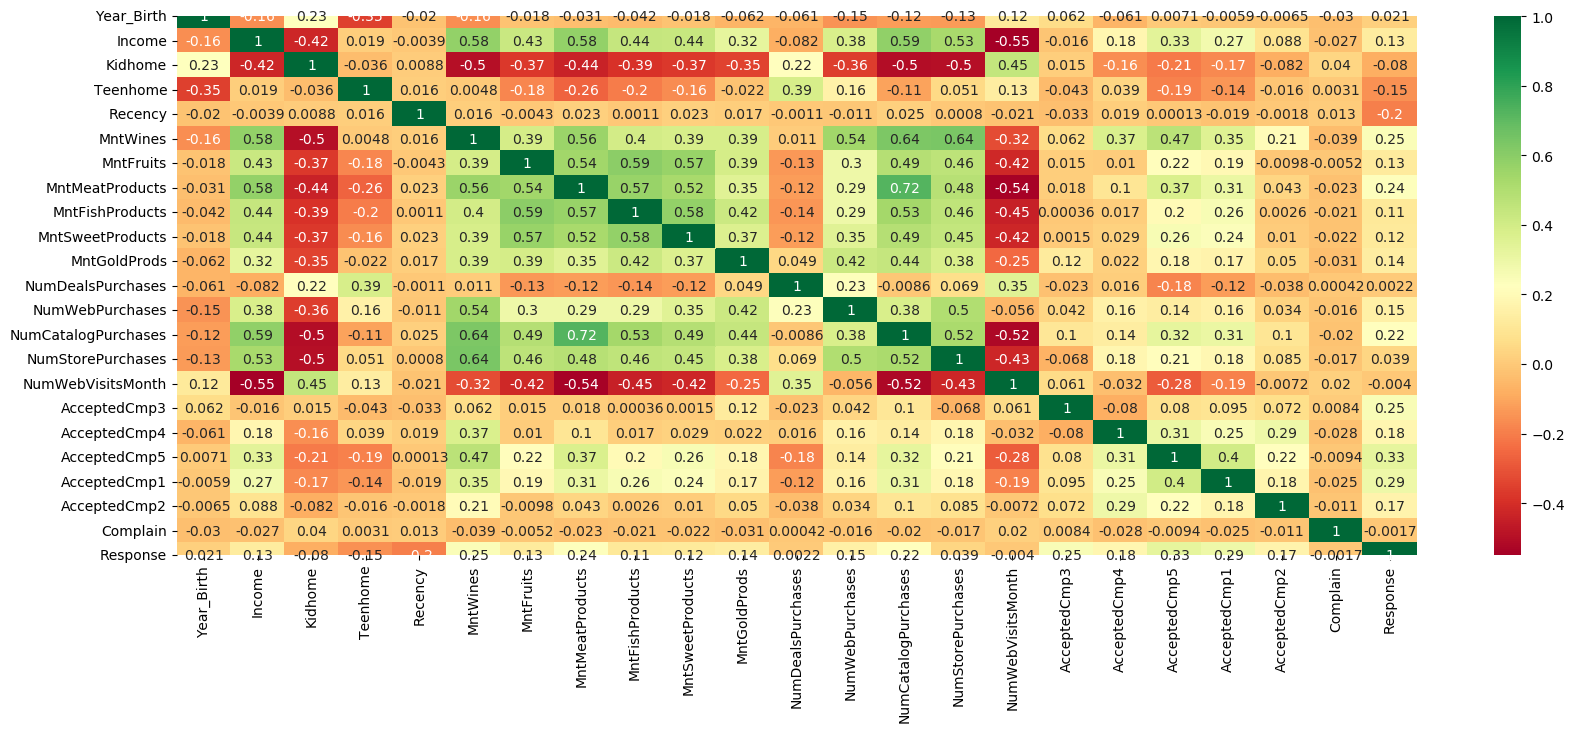

In [16]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Above Correlation shows there are very few variables closely related. 
1. All Number of purchases are above 0.5 and seem to be closely related
2. Similarly all amount purchased columns are also slightly closely related and can be grouped to denote one feature

In [17]:
# Converting birth year to age, considering age with respect to year 2020 because the data was last updated 3 years ago
data['Year_Birth'] = data['Year_Birth'].apply(lambda x: 2020-x)
data = data.rename(columns={'Year_Birth': 'Age'})
data[['Age']].head()

,Age
0,63
1,66
2,55
3,36
4,39


In [18]:
data.Education.value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

Education is Ordinal type variable.

By Doing some research "2nd Cycle" Eduction type usually represents graduate or masters level education in some countries [Source](https://www.studera.nu/startpage/higher-education-studies/higher-education-in-sweden/study-levels-and-degrees/)

So we transform education in order of education levels


1.   Basic
2.   Graduation
3.   Master / 2nd Cycle
4.   PhD



In [19]:
Education_map = {'Basic':1,
            'Graduation':2,
            'Master':3,
            '2n Cycle':3,
            'PhD':4}
# Create the mapped values in a new column
data['Education'] = data['Education'].map(Education_map)
# Review dataset
data[['Education']].head()

,Education
0,2
1,2
2,2
3,2
4,4


Dt_Customer represents how long a person was a customer, thus we convert the date to how many days it has been since a person became a customer of the store

In [20]:
from datetime import datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%Y-%m-%d')
data['Dt_Customer'] = (datetime(2020,1,1) - data['Dt_Customer']).dt.days
data[['Dt_Customer']].describe()

,Dt_Customer
count,2240.000000
mean,2365.582143
std,202.122512
min,2012.000000
25%,2192.750000
50%,2367.500000
75%,2541.000000
max,2711.000000




1.   Kidhome and Teenhome is combined to total number of children home
2.   All amounts are aggregated to amount spent denoting totoal amount spent by customer till now
3. All orders are clubbed to toal number of orders made by the customer
4. Previous campaign responses are clubbed to total number of campaigns accepted before



In [21]:
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns = ["Kidhome","Teenhome"],inplace = True)

data['AmountSpent'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']
data.drop(columns = ["MntWines",	"MntFruits"	,"MntMeatProducts",	"MntFishProducts","MntSweetProducts",	"MntGoldProds"],inplace = True)

data['NumPurchased'] = data['NumWebPurchases'] + data['NumCatalogPurchases'] + data['NumStorePurchases']
data.drop(columns = ["NumWebPurchases",	"NumCatalogPurchases",	"NumStorePurchases"],inplace = True)

data['Prev_campaigns'] = data['AcceptedCmp1'] + data['AcceptedCmp2'] + data['AcceptedCmp3'] + data['AcceptedCmp4'] + data['AcceptedCmp5']
data.drop(columns = ["AcceptedCmp3",	"AcceptedCmp4",	"AcceptedCmp5",	"AcceptedCmp1",	"AcceptedCmp2"],inplace = True)

data.head()


,Age,Education,Marital_Status,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns
0,63,2,Single,58138.0,2675,58,3,7,0,1,0,1617,22,0
1,66,2,Single,46344.0,2125,38,2,5,0,0,2,27,4,0
2,55,2,Together,71613.0,2324,26,1,4,0,0,0,776,20,0
3,36,2,Together,26646.0,2151,26,2,6,0,0,1,53,6,0
4,39,4,Married,58293.0,2173,94,5,5,0,0,1,422,14,0


/var/folders/qv/7nzw1kfx2wg1fmvdsrhvzmsc0000gn/T/ipykernel_32945/3965302480.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')


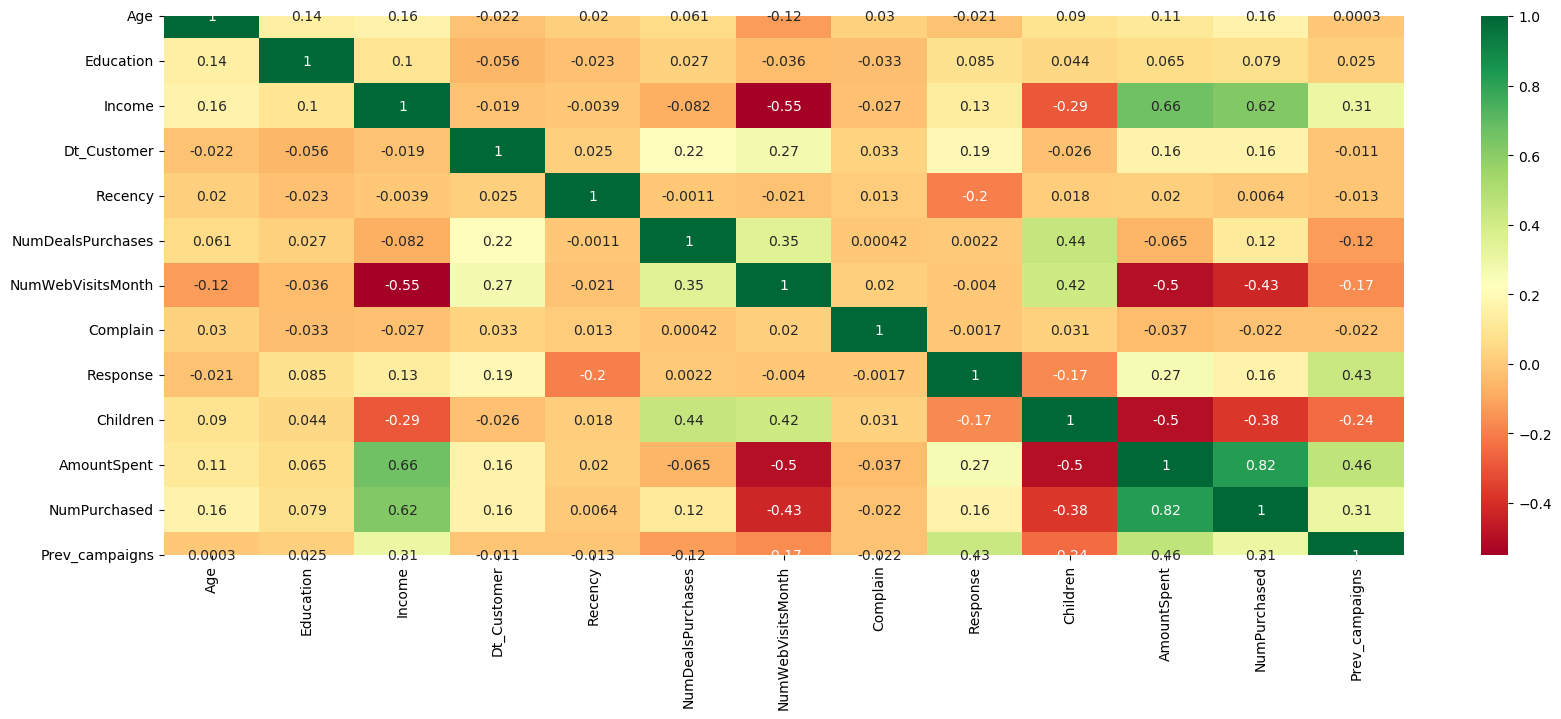

In [22]:
#The heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Aggregated data abouve shows a close correlation of amount spent and number of orders

In [23]:
data.Marital_Status.value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

Here different marital statuses denote the same thing thus we map them to two categories Couple and Single

In [24]:
maratial_map = {'Married':"Couple",
            'Together':"Couple",
            'Single':'Single',
            'Divorced':'Single',
            'Widow':'Single',
            'Alone':'Single',
            'Absurd':'Single',
            'YOLO':'Single'}
# Create the mapped values in a new column
data['Marital_Status'] = data['Marital_Status'].map(maratial_map)
# Review dataset
data[['Marital_Status']].head()

,Marital_Status
0,Single
1,Single
2,Couple
3,Couple
4,Couple


In [25]:
dummy_status = pd.get_dummies(data['Marital_Status'], prefix='Marital_Status')
dummy_status.head()

,Marital_Status_Couple,Marital_Status_Single
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0


Since maratial_status is a categorical column we create dummy variables

In [26]:
data = pd.concat([data, dummy_status], axis=1)
data.drop(['Marital_Status'], axis=1, inplace=True)

data

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
0,63,2,58138.0,2675,58,3,7,0,1,0,1617,22,0,0,1
1,66,2,46344.0,2125,38,2,5,0,0,2,27,4,0,0,1
2,55,2,71613.0,2324,26,1,4,0,0,0,776,20,0,1,0
3,36,2,26646.0,2151,26,2,6,0,0,1,53,6,0,1,0
4,39,4,58293.0,2173,94,5,5,0,0,1,422,14,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,53,2,61223.0,2393,46,2,5,0,0,1,1341,16,0,1,0
2236,74,4,64014.0,2031,56,7,7,0,0,3,444,15,1,1,0
2237,39,2,56981.0,2167,91,1,6,0,0,0,1241,18,1,0,1
2238,64,3,69245.0,2168,8,2,3,0,0,1,843,21,0,1,0


## Normalization

[Text(0, 0, 'Age'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Income'),
 Text(0, 0, 'Dt_Customer'),
 Text(0, 0, 'Recency'),
 Text(0, 0, 'NumDealsPurchases'),
 Text(0, 0, 'NumWebVisitsMonth'),
 Text(0, 0, 'Complain'),
 Text(0, 0, 'Response'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'AmountSpent'),
 Text(0, 0, 'NumPurchased'),
 Text(0, 0, 'Prev_campaigns'),
 Text(0, 0, 'Marital_Status_Couple'),
 Text(0, 0, 'Marital_Status_Single')]

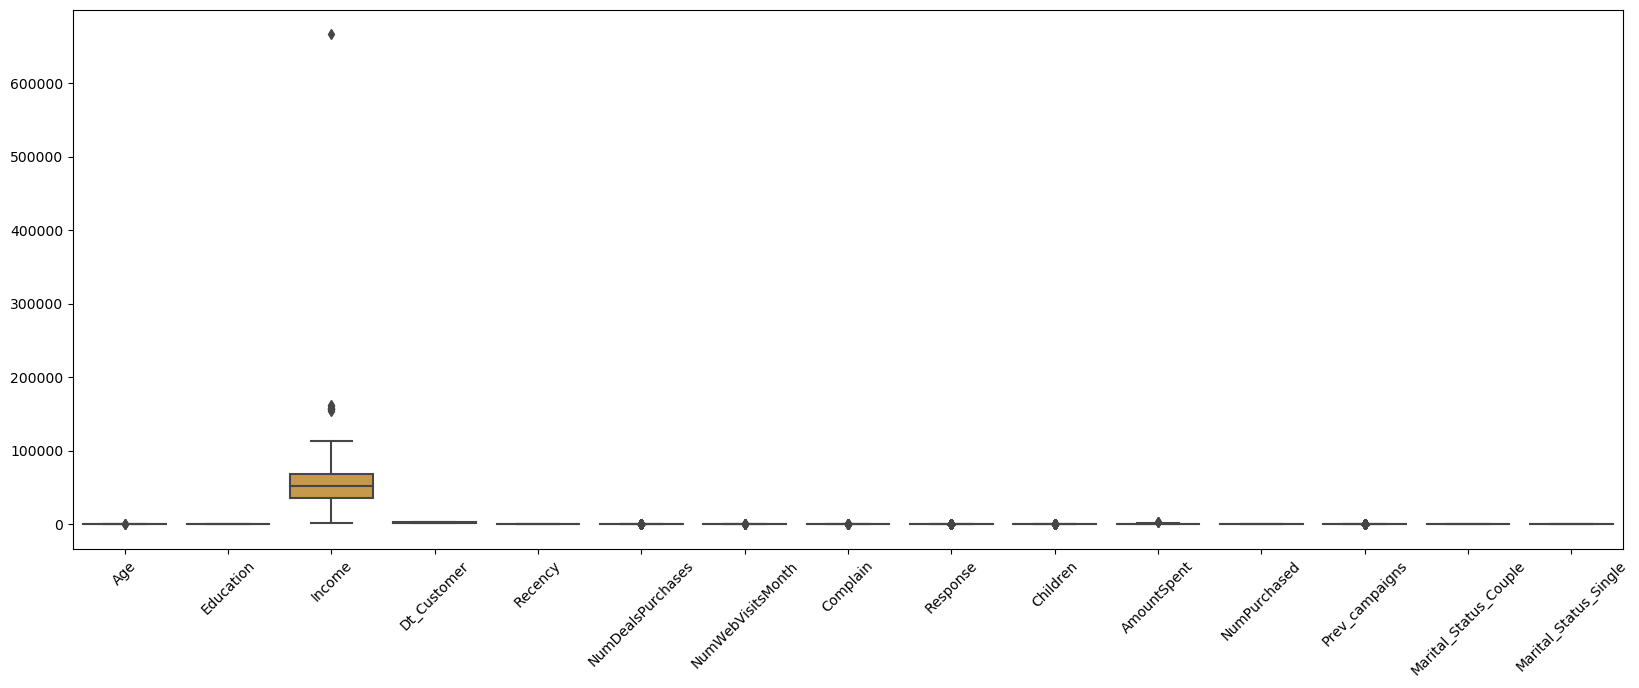

In [27]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

Box plot shows Income having outliers and there is a vast difference between range of values between Income and other columns. We need to normalize data so all variables have equal weightage

In [28]:
from sklearn import preprocessing

# Create x to store scaled values as floats
x = data[["Age",	"Education",	"Income",	"Dt_Customer",	"Recency",	"NumDealsPurchases",	"NumWebVisitsMonth",	"Children",	"AmountSpent",	"NumPurchased",	"Prev_campaigns"]].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)

# Run the normalizer on the dataframe
data[["Age",	"Education",	"Income",	"Dt_Customer",	"Recency",	"NumDealsPurchases",	"NumWebVisitsMonth",	"Children",	"AmountSpent",	"NumPurchased",	"Prev_campaigns"]] = pd.DataFrame(x_scaled)

data.head()

,Age,Education,Income,Dt_Customer,Recency,NumDealsPurchases,NumWebVisitsMonth,Complain,Response,Children,AmountSpent,NumPurchased,Prev_campaigns,Marital_Status_Couple,Marital_Status_Single
0,0.378641,0.333333,0.084832,0.948498,0.585859,0.200000,0.35,0,1,0.000000,0.639683,0.6875,0.0,0,1
1,0.407767,0.333333,0.067095,0.161660,0.383838,0.133333,0.25,0,0,0.666667,0.008730,0.1250,0.0,0,1
2,0.300971,0.333333,0.105097,0.446352,0.262626,0.066667,0.20,0,0,0.000000,0.305952,0.6250,0.0,1,0
3,0.116505,0.333333,0.037471,0.198856,0.262626,0.133333,0.30,0,0,0.333333,0.019048,0.1875,0.0,1,0
4,0.145631,1.000000,0.085065,0.230329,0.949495,0.333333,0.25,0,0,0.333333,0.165476,0.4375,0.0,1,0


[Text(0, 0, 'Age'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Income'),
 Text(0, 0, 'Dt_Customer'),
 Text(0, 0, 'Recency'),
 Text(0, 0, 'NumDealsPurchases'),
 Text(0, 0, 'NumWebVisitsMonth'),
 Text(0, 0, 'Complain'),
 Text(0, 0, 'Response'),
 Text(0, 0, 'Children'),
 Text(0, 0, 'AmountSpent'),
 Text(0, 0, 'NumPurchased'),
 Text(0, 0, 'Prev_campaigns'),
 Text(0, 0, 'Marital_Status_Couple'),
 Text(0, 0, 'Marital_Status_Single')]

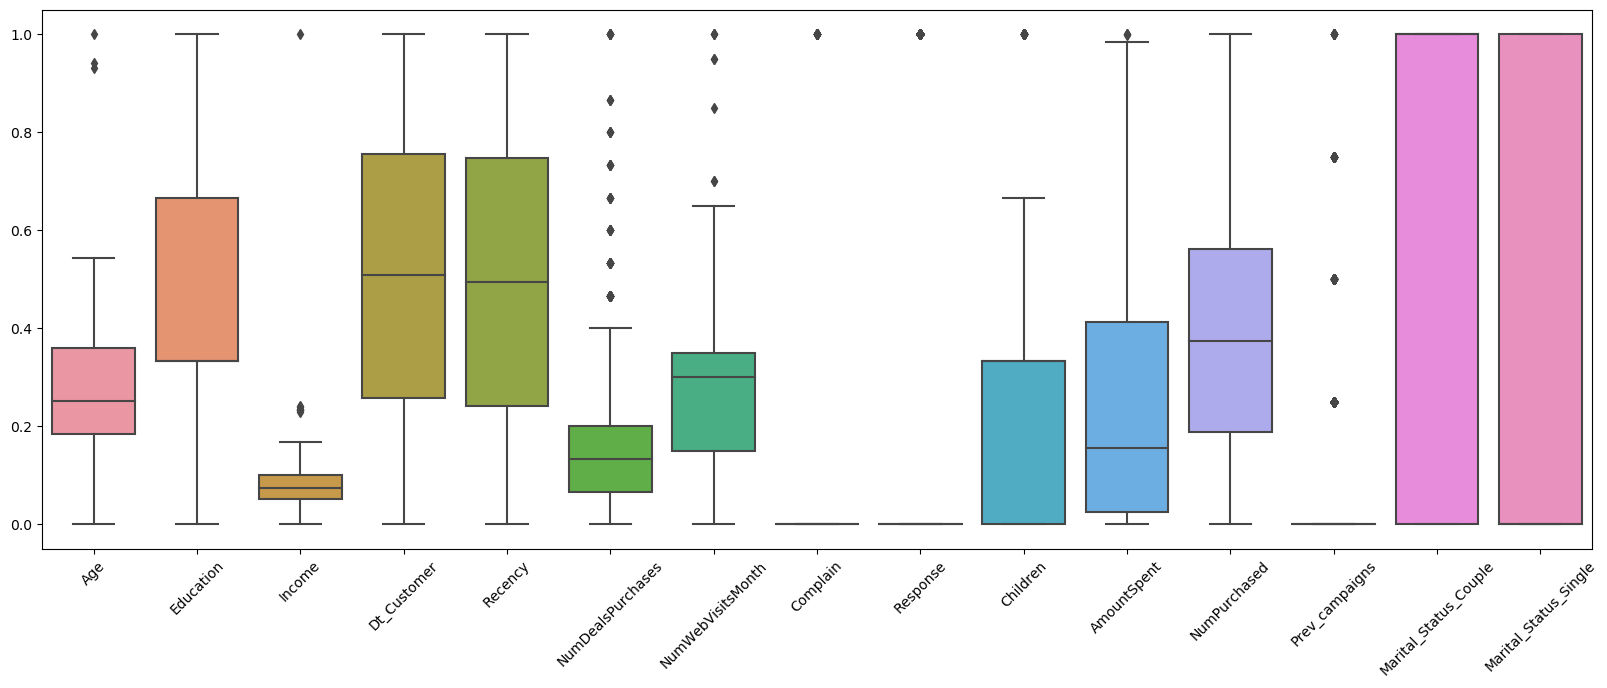

In [29]:
plt.figure(figsize=(20,7))
x = sns.boxplot(data=data)
x.set_xticklabels(x.get_xticklabels(),rotation=45)

<Figure size 800x500 with 0 Axes>

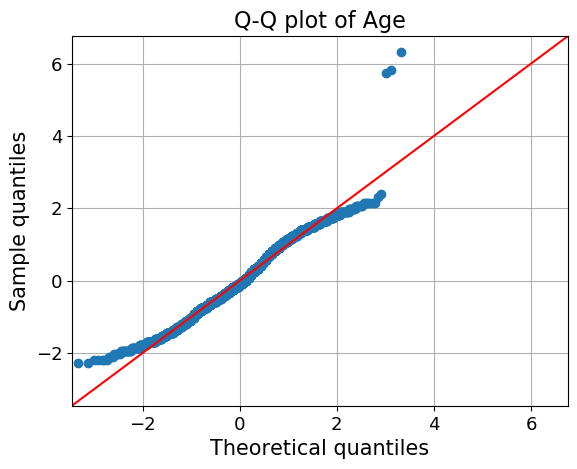

<Figure size 800x500 with 0 Axes>

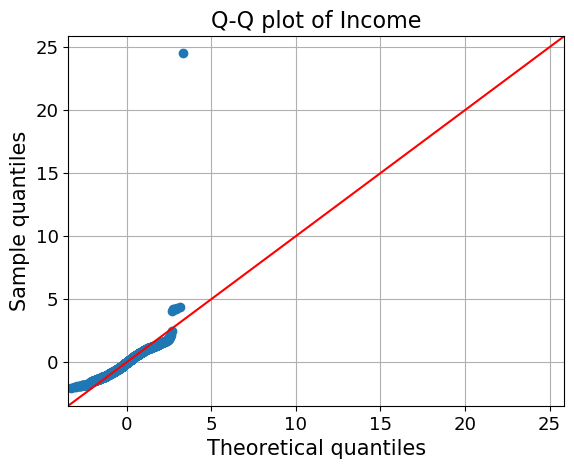

<Figure size 800x500 with 0 Axes>

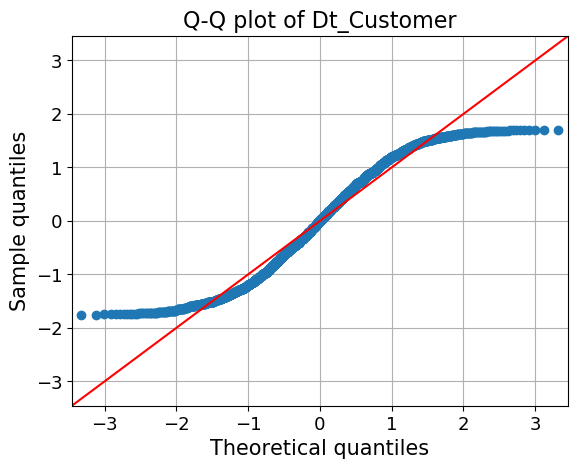

<Figure size 800x500 with 0 Axes>

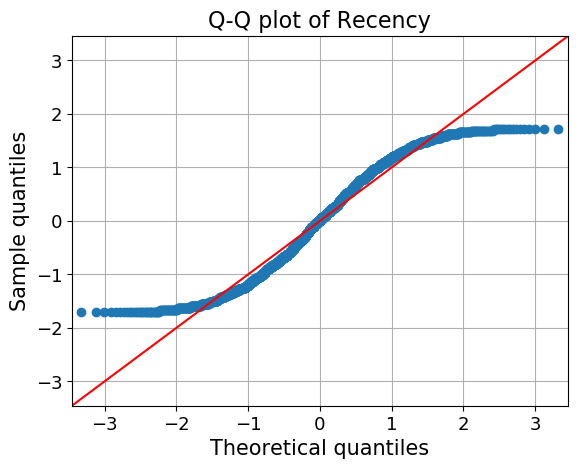

<Figure size 800x500 with 0 Axes>

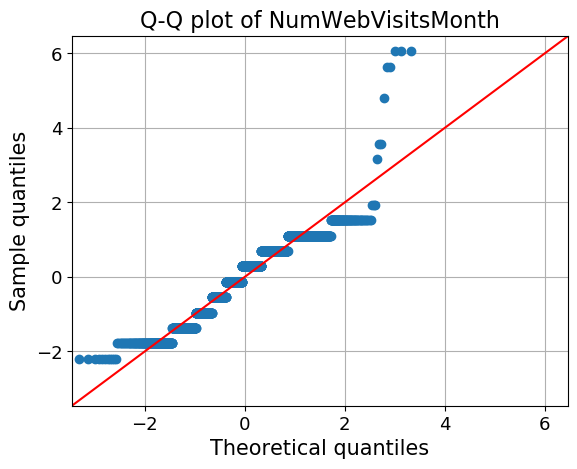

<Figure size 800x500 with 0 Axes>

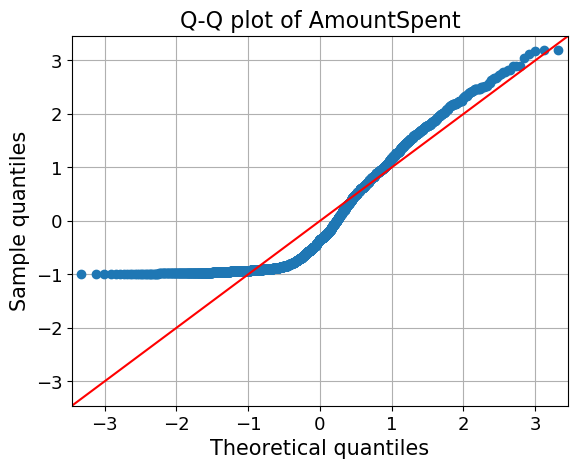

In [30]:
#checking the distribution of independent variables
data = data.dropna()
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age','Income','Dt_Customer','Recency','NumWebVisitsMonth','AmountSpent']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()



*   Q-Q plots show most of the data is normally distributed
*   There are few Outliers in Income and age



In [31]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Response'], data[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Response   R-squared:                       0.301
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     73.64
Date:                Sun, 09 Apr 2023   Prob (F-statistic):          3.34e-162
Time:                        16:13:45   Log-Likelihood:                -465.46
No. Observations:                2240   AIC:                             958.9
Df Residuals:                    2226   BIC:                             1039.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Age                      -0.0404      0.057     -0.712      0.477      -0.152       0.071
Education                 0.1118      0.023      4.859      0.000       0.067       0.157
Income                   -0.0596      0.246     -0.242      0.809      -0.543       0.423
Dt_Customer               0.2200      0.025      8.872      0.000       0.171       0.269
Recency                  -0.2388      0.022    -11.030      0.000      -0.281      -0.196
NumDealsPurchases         0.1661      0.063      2.648      0.008       0.043       0.289
NumWebVisitsMonth         0.1149      0.075      1.534      0.125      -0.032       0.262
Complain                  0.0383      0.066      0.582      0.560      -0.091       0.167
Children                 -0.1185      0.034     -3.469      0.001      -0.186      -0.052
AmountSpent               0.2087      0.057      3.642      0.000       0.096       0.321
NumPurchased             -0.1920      0.054     -3.571      0.000      -0.297      -0.087
Prev_campaigns            0.8237      0.043     19.082      0.000       0.739       0.908
Marital_Status_Couple     0.0158      0.037      0.431      0.666      -0.056       0.087
Marital_Status_Single     0.1247      0.037      3.356      0.001       0.052       0.198
==============================================================================
Omnibus:                      503.179   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              991.376
Skew:                           1.336   Prob(JB):                    5.31e-216
Kurtosis:                       4.865   Cond. No.                         54.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Logistic Regression

In [32]:
from sklearn.model_selection import  train_test_split

X = data[ ["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

y = data['Response']

#Spliting data into Training 76.5%, Validation set 13.5% and Test set 10%

X_t, X_test, y_t, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_t, y_t, test_size=0.15, random_state=1)

Splitting data for train test and validation
10% testing
15% of remaining train data for validation

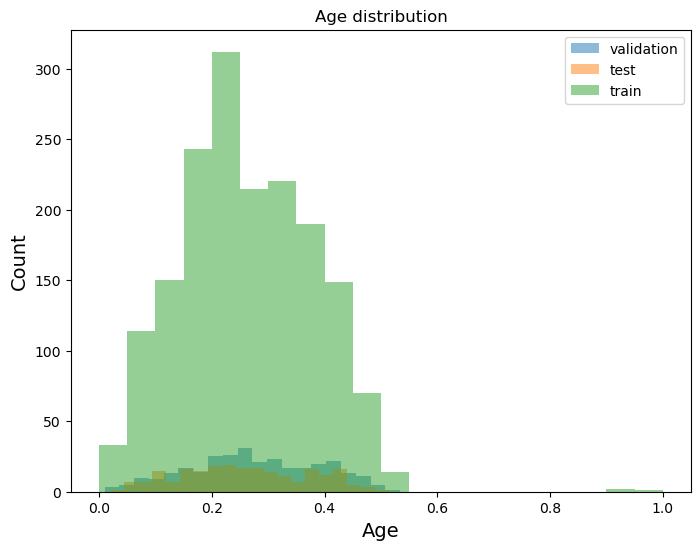

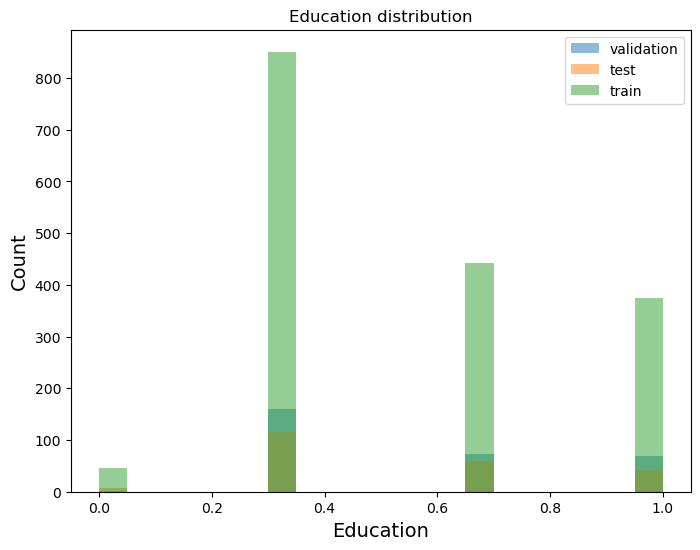

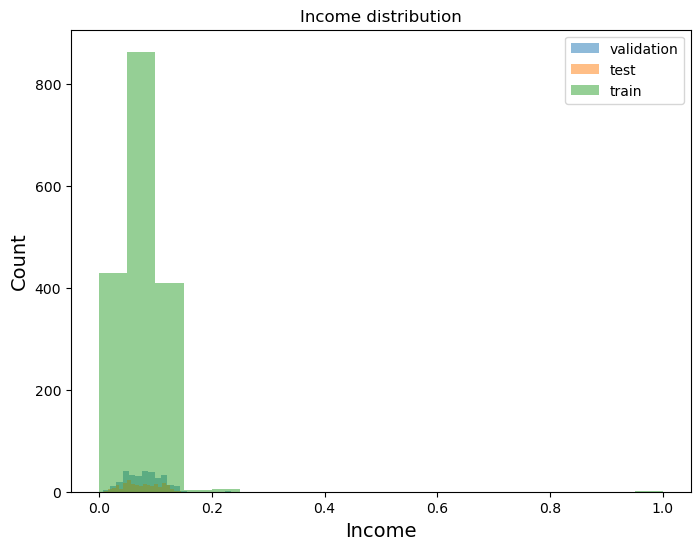

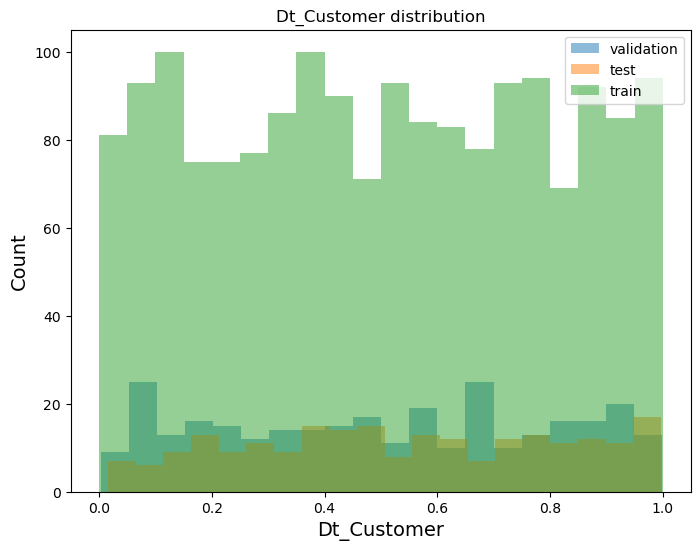

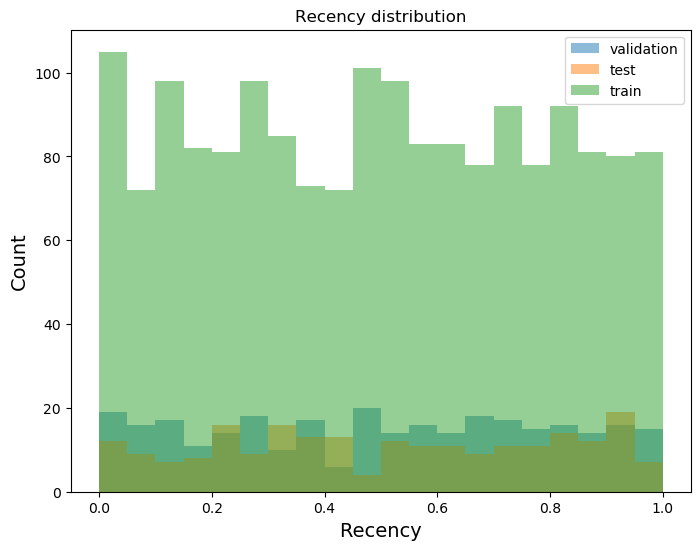

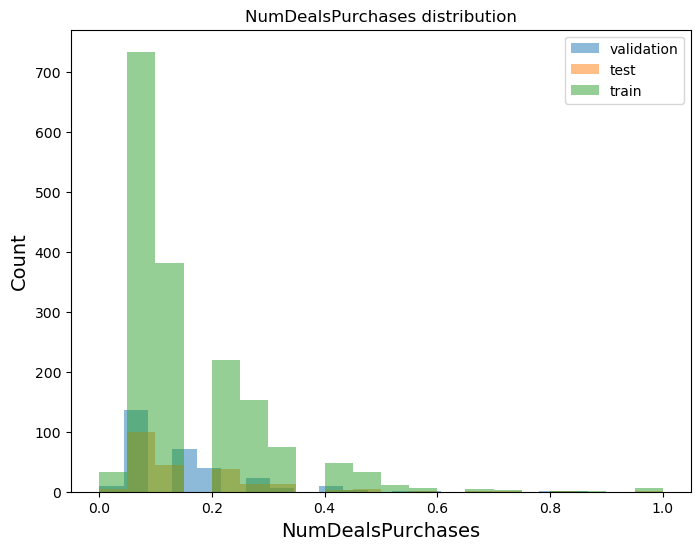

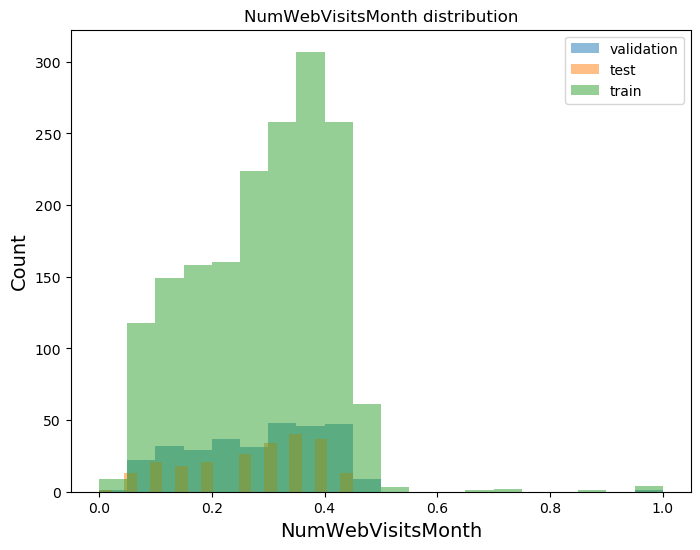

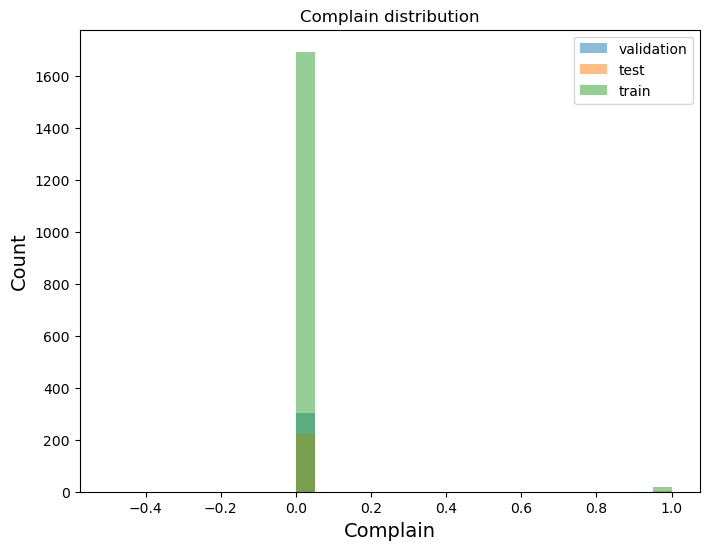

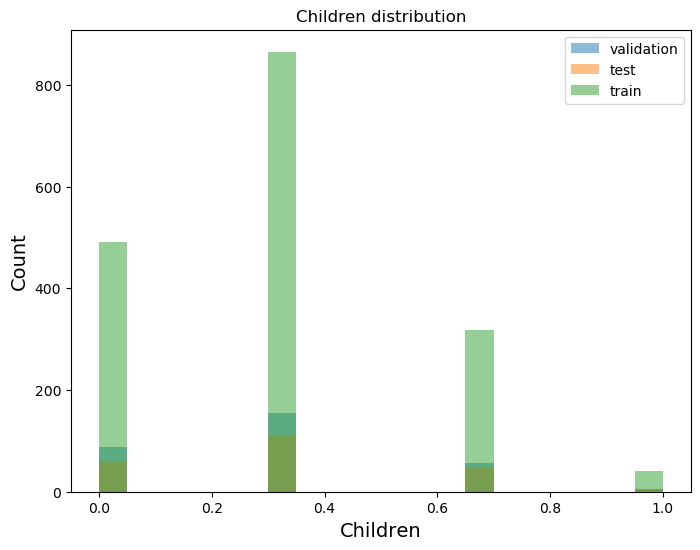

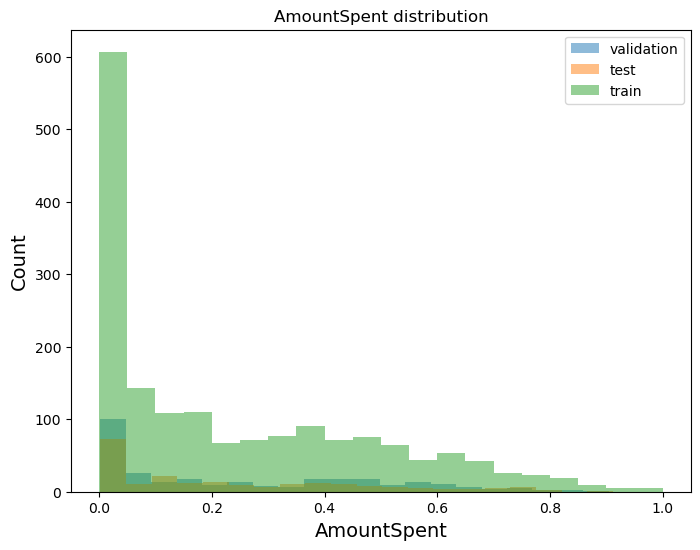

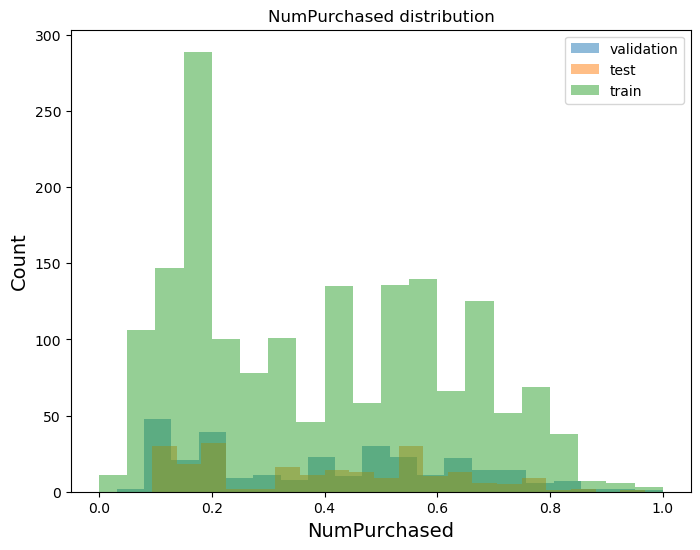

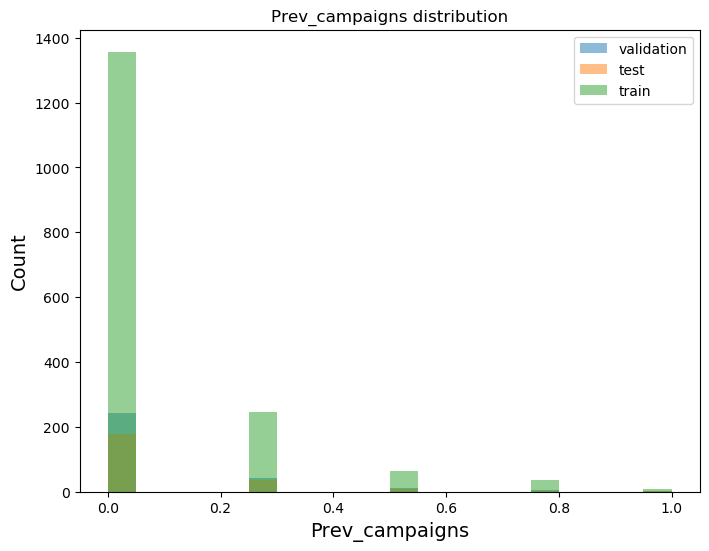

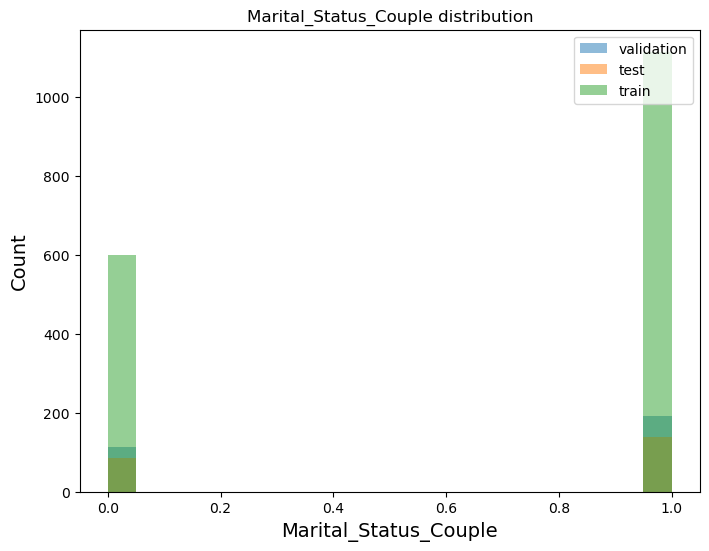

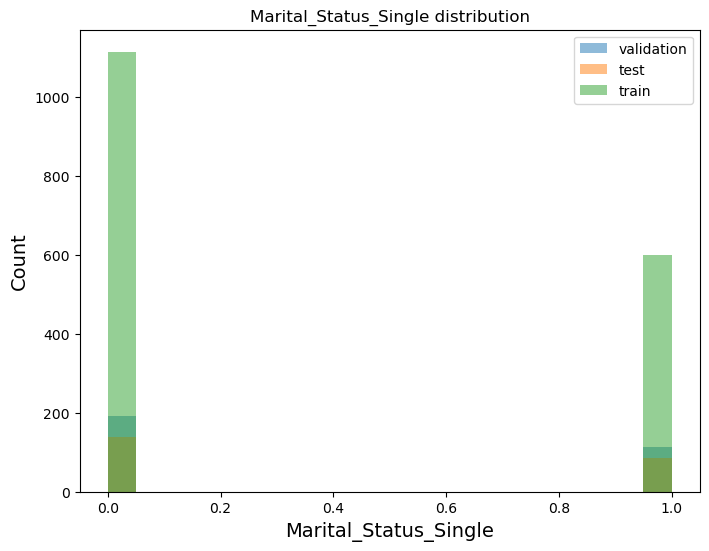

In [33]:
# Looking the data for test, training and validation set
X_test_plot = X_test[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

X_val_plot = X_val[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

X_train_plot = X_train[["Age",	"Education",	"Income",	"Dt_Customer",	
                                       "Recency"	,"NumDealsPurchases",	"NumWebVisitsMonth",	
                                       "Complain",	"Children",	"AmountSpent"	,"NumPurchased",	
                                       "Prev_campaigns",	"Marital_Status_Couple",	"Marital_Status_Single"]]

# Plotting the data to see the histogram
for c in X_test_plot.columns[:]:
  plt.figure(figsize=(8,6))
  plt.hist(X_val_plot[c], bins=20, alpha=0.5, label="validation")
  plt.hist(X_test_plot[c], bins=20, alpha=0.5, label="test")
  plt.hist(X_train_plot[c], bins=20, alpha=0.5, label="train")
  plt.xlabel(c, size=14)
  plt.ylabel("Count", size=14)
  plt.legend(loc='upper right')
  plt.title("{} distribution".format(c))
  plt.show()

Distribution shows our data splits are evenly distributed

In [35]:
logreg=LogisticRegression()
loggreg_final=logreg.fit(X_train,y_train)
print(loggreg_final.score(X_train,y_train))

0.8832457676590777
